In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml

In [ ]:
#load
mnist=fetch_openml('mnist_784', version=1)

In [ ]:
# preprocess
X = mnist.data.to_numpy().astype(np.float32) / 255.0
y = mnist.target.to_numpy().astype(np.int32)


In [ ]:
#split
i = np.random.permutation(len(X))
X = X[i]
y = y[i]

n = len(X)
split_index = int(0.8*n)
X_train = X[:split_index]
X_train = X_train.T

y_train = y[:split_index]

X_test = X[split_index:]
X_test = X_test.T

y_test = y[split_index:]

In [ ]:
#functions

def init_params():
  W1 = np.random.rand(10,784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
  return np.maximum(Z,0)

def softmax(Z):
  expZ = np.exp(Z - np.max(Z, axis=0, keepdims=True))
  return expZ / np.sum(expZ, axis=0, keepdims=True)

def forward_pass(W1,b1,W2,b2,X):
  Z1 = W1.dot(X) + b1
  A1 = ReLU(Z1)
  Z2 = W2.dot(A1) + b2
  A2 = softmax(Z2)
  return Z1,A1,Z2,A2

def ReLU_deriv(Z):
  return Z>0

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def backpropogation(Z1,A1,Z2,A2,W1,W2,X,Y):
  m = X.shape[1]
  one_hot_Y = one_hot(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = (1 / m) * dZ2.dot(A1.T)
  db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
  dW1 = (1 / m) * dZ1.dot(X.T)
  db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
  return dW1, db1, dW2, db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,lr):
  W1 = W1 - lr*dW1
  b1 = b1 - lr*db1
  W2 = W2 - lr*dW2
  b2 = b2 - lr*db2
  return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def get_loss(A2, Y):
    m = Y.shape[0]
    one_hot_Y = one_hot(Y)
    log_probs = np.log(A2 + 1e-8)
    loss = -np.sum(one_hot_Y * log_probs) / m
    return loss


In [ ]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    losses = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_pass(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backpropogation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0 or i == iterations :
            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)
            loss = get_loss(A2, Y)
            print(f"Iteration {i} — Loss: {loss:.4f}, Accuracy: {acc:.4f}")
            losses.append(loss)
    return W1, b1, W2, b2,losses


In [ ]:
#train
W1, b1, W2, b2,losses = gradient_descent(X_train, y_train, 0.20, 1000)

[8 4 3 ... 3 4 4] [4 8 6 ... 1 4 5]
Iteration 0 — Loss: 3.2801, Accuracy: 0.1182
[4 7 6 ... 1 4 3] [4 8 6 ... 1 4 5]
Iteration 100 — Loss: 0.7101, Accuracy: 0.7711
[4 7 6 ... 1 4 5] [4 8 6 ... 1 4 5]
Iteration 200 — Loss: 0.5323, Accuracy: 0.8357
[4 7 6 ... 1 4 5] [4 8 6 ... 1 4 5]
Iteration 300 — Loss: 0.4654, Accuracy: 0.8592
[4 7 6 ... 1 4 5] [4 8 6 ... 1 4 5]
Iteration 400 — Loss: 0.4271, Accuracy: 0.8716
[4 7 6 ... 1 4 5] [4 8 6 ... 1 4 5]
Iteration 500 — Loss: 0.4031, Accuracy: 0.8801
[4 7 6 ... 1 4 5] [4 8 6 ... 1 4 5]
Iteration 600 — Loss: 0.3856, Accuracy: 0.8858
[4 7 6 ... 1 4 5] [4 8 6 ... 1 4 5]
Iteration 700 — Loss: 0.3717, Accuracy: 0.8895
[4 7 6 ... 1 4 5] [4 8 6 ... 1 4 5]
Iteration 800 — Loss: 0.3602, Accuracy: 0.8928
[4 7 6 ... 1 4 5] [4 8 6 ... 1 4 5]
Iteration 900 — Loss: 0.3504, Accuracy: 0.8964


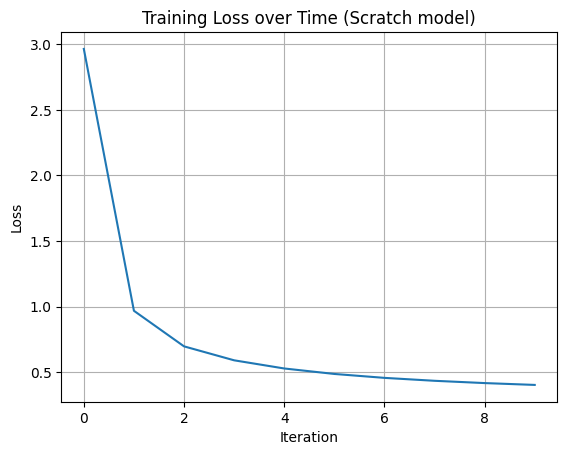

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(len(losses)), losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss over Time (Scratch model)')
plt.grid(True)
plt.show()

In [ ]:
# testing
def make_predictions(X, W1, b1, W2, b2):
    Z1,A1,Z2,A2 = forward_pass(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def evaluate_accuracy(X, y, W1, b1, W2, b2):
    predictions = make_predictions(X, W1, b1, W2, b2)
    accuracy = get_accuracy(predictions, y)
    print("Test Accuracy:", accuracy)

def show_predictions_grid(X_test, y_test, W1, b1, W2, b2, indices, num_rows=2, num_cols=5):
    plt.figure(figsize=(2.5 * num_cols, 3 * num_rows))

    for i, index in enumerate(indices):
        current_image = X_test[:, index, None]
        prediction = make_predictions(current_image, W1, b1, W2, b2)
        label = y_test[index]

        image = current_image.reshape(28, 28) * 255

        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(image, cmap='gray', interpolation='nearest')
        plt.title(f"Pred: {prediction[0]}\nLabel: {label}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
evaluate_accuracy(X_test, y_test, W1, b1, W2, b2)

[5 8 5 ... 8 3 4] [5 8 5 ... 0 3 4]
Test Accuracy: 0.8932142857142857


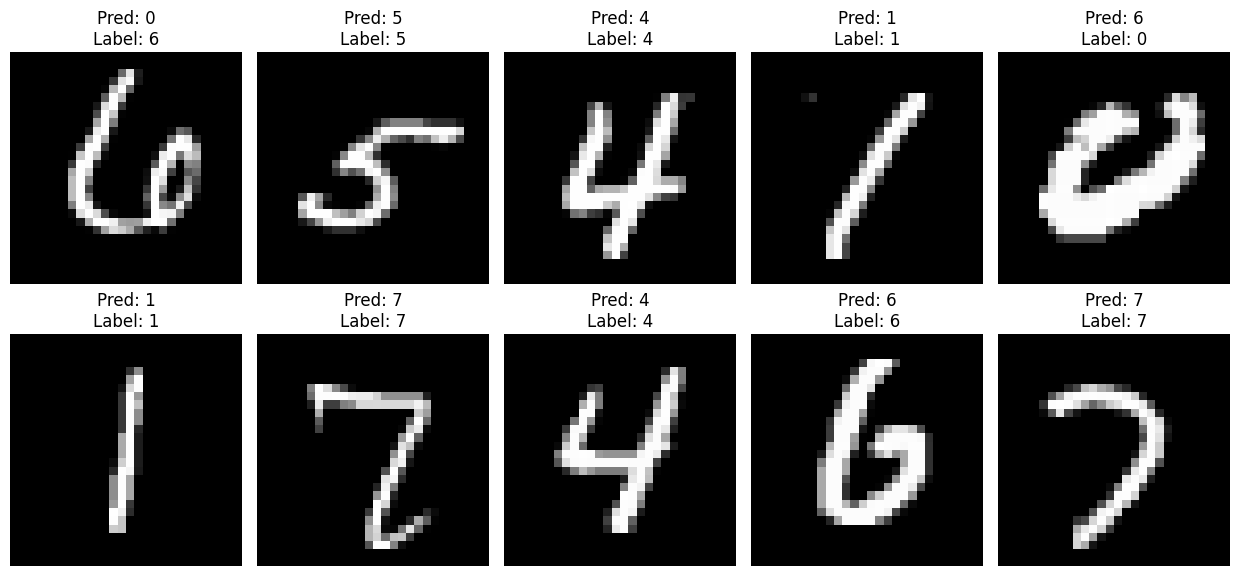

In [ ]:
indices = np.random.choice(X_test.shape[1], size=10, replace=False)

show_predictions_grid(X_test, y_test, W1, b1, W2, b2, indices, num_rows=2, num_cols=5)

# **Using PyTorch**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
# split
X = mnist.data.to_numpy().astype(np.float32) / 255.0
y = LabelEncoder().fit_transform(mnist.target)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [ ]:
# Data loading
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
test_ds = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=64)

In [ ]:
# model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.z1 = nn.Linear(784, 10)
        self.z2 = nn.Linear(10, 10)

    def forward(self, x):
        x = F.relu(self.z1(x))
        x = self.z2(x)
        return x

In [ ]:
# training
model = SimpleNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
loss_values = []

for epoch in range(10):
    total_loss = 0
    correct = 0
    total = 0

    for xb, yb in train_loader:
        optimizer.zero_grad()
        out = model(xb)
        loss = criterion(out, yb)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        preds = out.argmax(dim=1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)

    average_loss = total_loss / len(train_loader)
    loss_values.append(average_loss)
    print(f"Epoch {epoch+1}, Loss: {average_loss:.4f}, Accuracy: {correct/total:.4f}")

Epoch 1, Loss: 0.4402, Accuracy: 0.8711
Epoch 2, Loss: 0.3300, Accuracy: 0.9038
Epoch 3, Loss: 0.3182, Accuracy: 0.9077
Epoch 4, Loss: 0.3084, Accuracy: 0.9110
Epoch 5, Loss: 0.2996, Accuracy: 0.9126
Epoch 6, Loss: 0.2902, Accuracy: 0.9158
Epoch 7, Loss: 0.2846, Accuracy: 0.9178
Epoch 8, Loss: 0.2807, Accuracy: 0.9165
Epoch 9, Loss: 0.2807, Accuracy: 0.9179
Epoch 10, Loss: 0.2773, Accuracy: 0.9192


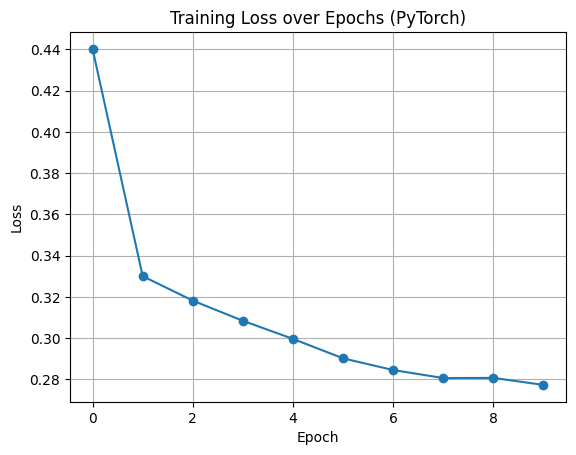

In [ ]:
import matplotlib.pyplot as plt

plt.plot(loss_values, marker='o')
plt.title("Training Loss over Epochs (PyTorch)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [ ]:
# accuracy
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for xb, yb in test_loader:
        out = model(xb)
        preds = out.argmax(dim=1)
        correct += (preds == yb).sum().item()
        total += yb.size(0)

print(f"Test Accuracy: {correct / total:.4f}")

Test Accuracy: 0.9192


In [ ]:
# show predictions
def show_predictions_grid(images, predictions, labels, num_rows=2, num_cols=5):
    plt.figure(figsize=(2.5 * num_cols, 3 * num_rows))

    for i in range(num_rows * num_cols):
        image = images[i].view(28, 28)
        plt.subplot(num_rows, num_cols, i + 1)
        # Reshape the flattened image to 28x28 before displaying
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predictions[i]}\nLabel: {labels[i]}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

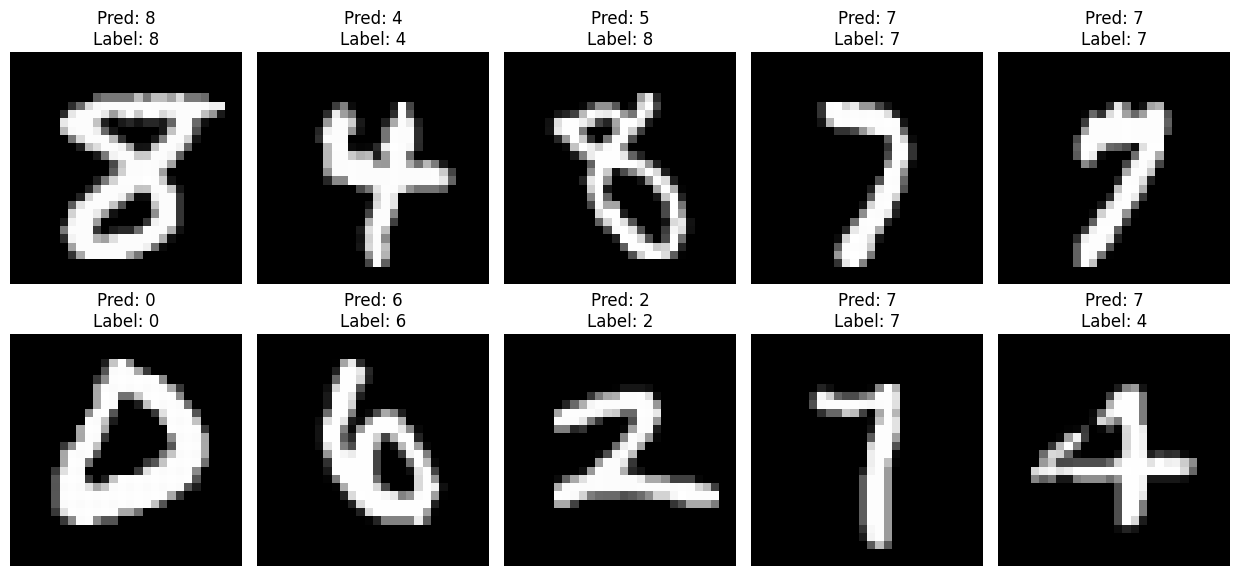

In [ ]:
images, labels = next(iter(test_loader))

model.eval()
with torch.no_grad():
    outputs = model(images)
    preds = outputs.argmax(dim=1)

# Display the grid of predictions
show_predictions_grid(images, preds, labels, num_rows=2, num_cols=5)